In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sympy as sym
from string import ascii_uppercase
from collections import Counter

In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt

--2024-01-12 23:11:09--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273 [text/plain]
Saving to: ‘kundera.txt’

kundera.txt         100%[===================>]     273  --.-KB/s    in 0s      

2024-01-12 23:11:10 (23.5 MB/s) - ‘kundera.txt’ saved [273/273]



In [ ]:
!cat kundera.txt

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

What we have not chosen we cannot consider either our merit or our failure.

The heavier the burden, the closer our lives come to the earth, the more real and truthful they become. Conversely, the absolute absence of burden causes man to be lighter than air, to soar into heights, take leave of the earth and his earthly being, and become only half real, his movements as free as they are insignificant. What then shall we choose? Weight or lightness? ... When we want to give expression to a dramatic situation in our lives, we tend to use metaphors of heaviness. We say that something has become a great burden to us. We either bear the burden or fail and go down with it, we struggle with it, win or lose. And Sabina – wha

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

What we have not chosen we cannot consider either our merit or our failure.


The heavier the burden, the closer our lives come to the earth, the more real and truthful they become. Conversely, the absolute absence of burden causes man to be lighter than air, to soar into heights, take leave of the earth and his earthly being, and become only half real, his movements as free as they are insignificant. What then shall we choose? Weight or lightness? ... When we want to give expression to a dramatic situation in our lives, we tend to use metaphors of heaviness. We say that something has become a great burden to us. We either bear the burden or fail and go down with it, we struggle with it, win or lose. And Sabina – what had come over her? Nothing. She had left a man because she felt like leaving him. Had he persecuted her? Had he tried to take revenge on her? No. Her drama was a drama not of heaviness but of lightness. What fell to her lot was not the burden, but the unbearable lightness of being



In [ ]:
file = open("kundera.txt")  # open txt document
texto = file.read()  # read the content as a string
file.close()
texto

'Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.\n\nWhat we have not chosen we cannot consider either our merit or our failure.\n\nThe heavier the burden, the closer our lives come to the earth, the more real and truthful they become. Conversely, the absolute absence of burden causes man to be lighter than air, to soar into heights, take leave of the earth and his earthly being, and become only half real, his movements as free as they are insignificant. What then shall we choose? Weight or lightness? ... When we want to give expression to a dramatic situation in our lives, we tend to use metaphors of heaviness. We say that something has become a great burden to us. We either bear the burden or fail and go down with it, we struggle with it, win or lose. And Sabina 

### Markov text generator

1. Preprocess text
  - Split text (in words, words are our states in the Markov chain)
  - Remove punctuation
  - Convert text to lower case

2. Explore your data
  - Unique words and frequency

3. Define states and transition matrix (reading the text, learning)
  - Explore matrix
  - Explore state-transition diagram (text graph)

4. Implement and test the text generator (random walk in the Markov chain)

In [ ]:
# split text
words = texto.split()
words

['Chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us.',
 'Everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity,',
 'everything',
 'expected,',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out,',
 'is',
 'mute.',
 'Only',
 'chance',
 'can',
 'speak',
 'to',
 'us.',
 'We',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup.',
 'What',
 'we',
 'have',
 'not',
 'chosen',
 'we',
 'cannot',
 'consider',
 'either',
 'our',
 'merit',
 'or',
 'our',
 'failure.',
 'The',
 'heavier',
 'the',
 'burden,',
 'the',
 'closer',
 'our',
 'lives',
 'come',
 'to',
 'the',
 'earth,',
 'the',
 'more',
 'real',
 'and',
 'truthful',
 'they',
 'become.',
 'Conversely,',
 'the',
 'absolute',
 'absence',
 'of',
 'burden',
 'causes',
 'man',
 'to',
 'be',
 'lighter',
 'than',
 'air,',
 'to',
 'soar',
 'into',
 'heights,',
 'take',
 'leave',
 'of',
 'the',
 'earth'

In [ ]:
# import string module
# and we will use string.punctuation
# para identificar cualquier signo de puntuación

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
table = str.maketrans('', '', string.punctuation)
words[8]

'us.'

In [ ]:
words[8].translate(table)

'us'

In [ ]:
# remove punctuation
# iterate over all words
stripped = [w.translate(table) for w in words]
stripped[:10]

# iterate over all words and trasform to lowercase
words_min = [w.lower() for w in stripped]
words_min

['chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'we',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup',
 'what',
 'we',
 'have',
 'not',
 'chosen',
 'we',
 'cannot',
 'consider',
 'either',
 'our',
 'merit',
 'or',
 'our',
 'failure',
 'the',
 'heavier',
 'the',
 'burden',
 'the',
 'closer',
 'our',
 'lives',
 'come',
 'to',
 'the',
 'earth',
 'the',
 'more',
 'real',
 'and',
 'truthful',
 'they',
 'become',
 'conversely',
 'the',
 'absolute',
 'absence',
 'of',
 'burden',
 'causes',
 'man',
 'to',
 'be',
 'lighter',
 'than',
 'air',
 'to',
 'soar',
 'into',
 'heights',
 'take',
 'leave',
 'of',
 'the',
 'earth',
 'and',
 'hi

In [ ]:
print(np.where(np.array(words_min) == ''), np.where(np.array(words_min) == '–')) 
words_min = words_min[:131] + words_min[132:184] + words_min[185:]
words_min

(array([131]),) (array([184]),)


['chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'we',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup',
 'what',
 'we',
 'have',
 'not',
 'chosen',
 'we',
 'cannot',
 'consider',
 'either',
 'our',
 'merit',
 'or',
 'our',
 'failure',
 'the',
 'heavier',
 'the',
 'burden',
 'the',
 'closer',
 'our',
 'lives',
 'come',
 'to',
 'the',
 'earth',
 'the',
 'more',
 'real',
 'and',
 'truthful',
 'they',
 'become',
 'conversely',
 'the',
 'absolute',
 'absence',
 'of',
 'burden',
 'causes',
 'man',
 'to',
 'be',
 'lighter',
 'than',
 'air',
 'to',
 'soar',
 'into',
 'heights',
 'take',
 'leave',
 'of',
 'the',
 'earth',
 'and',
 'hi

<BarContainer object of 134 artists>

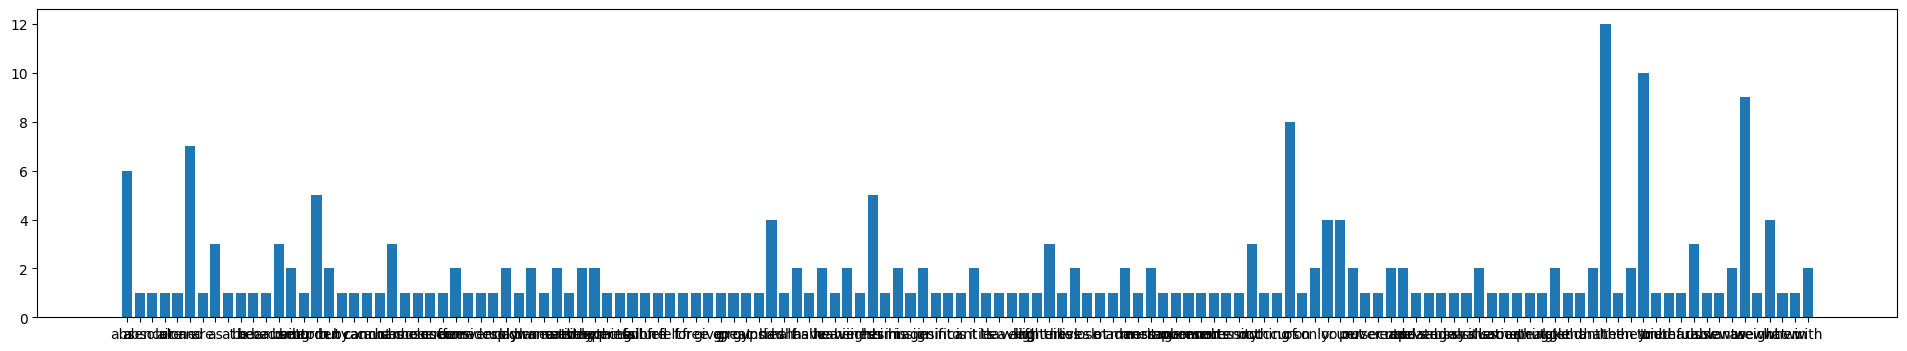

In [ ]:
# Markov states (words_names)
# States will be the unique words in our list
words_names, fw = np.unique(words_min, return_counts=True)
plt.figure(figsize=(24,4))
plt.bar(words_names, fw)

<AxesSubplot:>

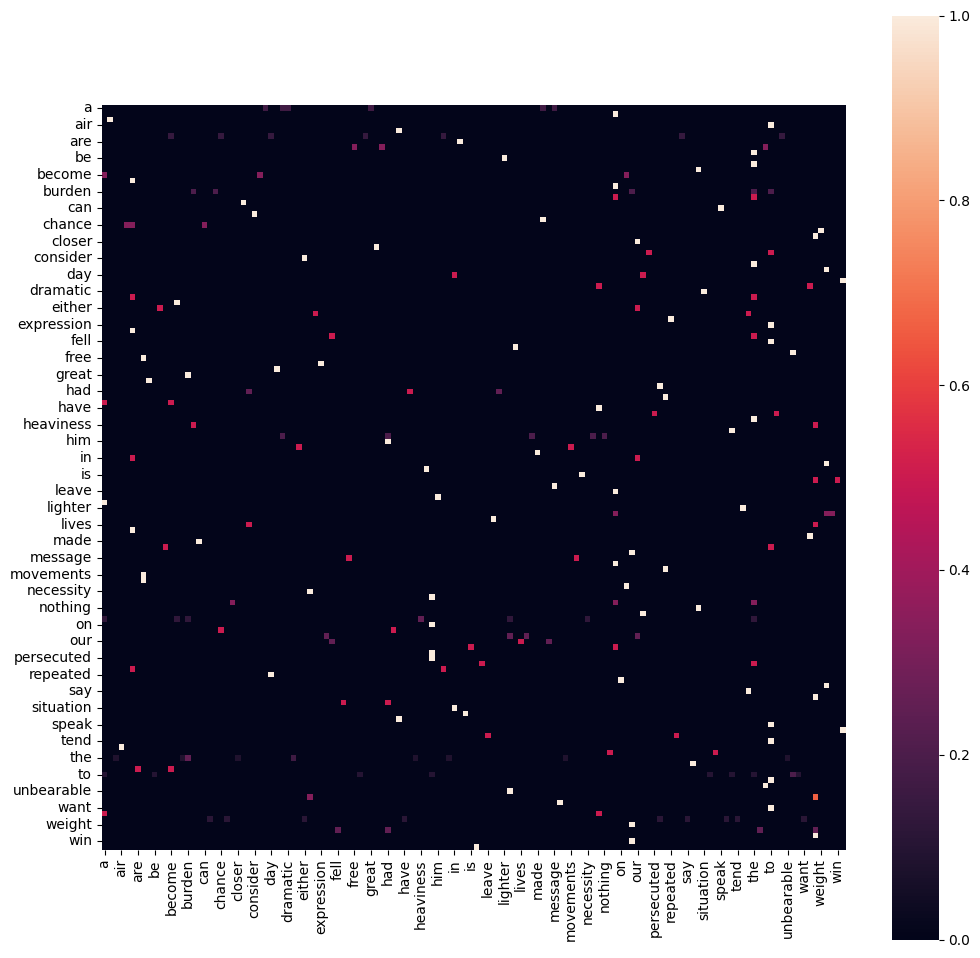

In [ ]:
# States of the Markov chain: unique words
words_names = np.unique(words_min)

unique_words = len(words_names)

# Dataframe, because we want to name the columns and rows
# the names are the states
# Transition matrix of size nxn, n: states in Markov, unique words
# The matrix stars as a zero matrix
# We will count how many times a word is followed by other word
df = pd.DataFrame(np.zeros((unique_words, unique_words)),
    columns=words_names, index=words_names
    )

# Here we are reading
for i in range(1, len(words_min)):
    row = words_min[i-1]  # from (left)
    col = words_min[i]  # to (right)
    df[col][row] += 1  # increase the counter

df['failure']['failure'] = 1  # This is a sink (absorbing state)

# Convert counting into probabilities 
df.loc[:,:] = df.loc[:,:].div(df.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))
sns.heatmap(df, cbar=True, square=True) #annot=True)

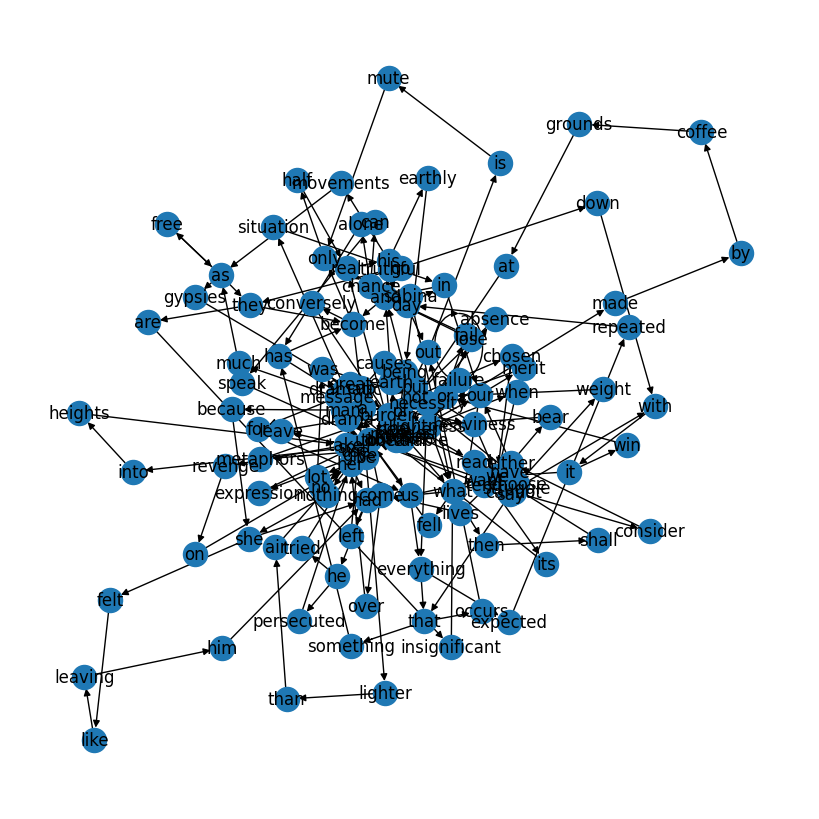

In [ ]:
import networkx as nx

# Create graph from matrix
G = nx.from_numpy_matrix(df.values, create_using=nx.DiGraph())
# Give names to nodes (states/words)
label_mapping = {idx: val for idx, val in enumerate(df.columns)}
G = nx.relabel_nodes(G, label_mapping)
plt.figure(figsize=(8,8))
# Plot graph (ther are algorithm just to place the nodes in a layout)
nx.draw_kamada_kawai(G, with_labels=True)

In [ ]:
# This is our random walk
def rw_graph(start, steps, states, df):
    walk = [start]
    for si in range(steps):
        p = df.loc[walk[-1], :]
        walk += [np.random.choice(states, p=p)]
        if walk[-1] == walk[-2]: break  # this should not be necessary
    return walk[:-1]

for i in range(10):
    w = ' '.join(rw_graph('chance', 8, words_names, df))
    print(w)

chance can speak to us everything expected repeated
chance can speak to use metaphors of a
chance alone has become a message for us
chance can speak to the images made by
chance alone has a great burden or fail
chance alone has a message much as gypsies
chance can speak to give expression to take
chance can speak to her drama not chosen
chance and truthful they become conversely the earth
chance can speak to her no her lot


In [ ]:
!cat kundera.txt

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

What we have not chosen we cannot consider either our merit or our failure.

In [ ]:
for i in range(10):
    start = np.random.choice(words_names)
    w = ' '.join(rw_graph(start, 8, words_names, df))
    print(w)

absence of a man to give expression to
persecuted her had left a drama not chosen
over her no her drama not chosen we
necessity everything that occurs out of necessity everything
lose and sabina what had left a great
message much as they become a man to
come to give expression to us everything expected
because she had left a man to her
leaving him had he tried to soar into
truthful they become only half real and his


### Resources

- https://github.com/Gr3gP/NLP-Projects/blob/main/Text_Generation_with_Markovify_Shakespeare.ipynb
- https://stats.stackexchange.com/questions/2457/markov-process-that-depends-on-present-state-and-past-state

Proyecto final:

1. https://anaconda.org/marsgr6/proyecto_ms_202410/notebook
2. https://anaconda.org/msgonzalez/proyecto_final_ms202220/notebook

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>